In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
data = pd.read_csv('ethusd_tweets.csv')[::-1]

In [3]:
N = 360

highp = pd.to_numeric(data.ix[:, 'High'][-N:])
lowp = pd.to_numeric(data.ix[:, 'Low'][-N:])
openp = pd.to_numeric(data.ix[:, 'Open'][-N:])
closep = pd.to_numeric(data.ix[:, 'Close'][-N:])
tweets = pd.to_numeric(data.ix[:, 'Tweets'].replace('null', 0)[-N:])
volume = pd.to_numeric(data.ix[:, 'Volume'][-N:])
marketcap = pd.to_numeric(data.ix[:, 'Market Cap'][-N:])

normal_close = closep

highp = highp.pct_change().replace(np.nan, 0).replace(np.inf, 0)
lowp = lowp.pct_change().replace(np.nan, 0).replace(np.inf, 0)
openp = openp.pct_change().replace(np.nan, 0).replace(np.inf, 0)
closep = closep.pct_change().replace(np.nan, 0).replace(np.inf, 0)
tweets = tweets.pct_change().replace(np.nan, 0).replace(np.inf, 0)
volume = volume.pct_change().replace(np.nan, 0).replace(np.inf, 0)
marketcap = marketcap.pct_change().replace(np.nan, 0).replace(np.inf, 0)

normal_close = np.array(normal_close)
highp = np.array(highp)
lowp = np.array(lowp)
openp = np.array(openp)
closep = np.array(closep)
tweets = np.array(tweets)
volume = np.array(volume)
marketcap = np.array(marketcap)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
WINDOW = 7
STEP = 1
FORECAST = 1

X, Y = [], []
for i in range(0, len(openp), STEP): 
    try:
        o = openp[i:i+WINDOW]
        h = highp[i:i+WINDOW]
        l = lowp[i:i+WINDOW]
        c = closep[i:i+WINDOW]
        v = volume[i:i+WINDOW]
        t = tweets[i:i+WINDOW]
        m = marketcap[i:i+WINDOW]
        
#         y_i = (normal_close[i+WINDOW+FORECAST] - normal_close[i+WINDOW]) / normal_close[i+WINDOW]
        y_i = closep[i+WINDOW+FORECAST]
        x_i = np.column_stack((o, h, l, c, v, t, m))
        x_i = x_i.flatten()

    except Exception as e:
        break

    X.append(x_i)
    Y.append(y_i)

X, Y = np.array(X), np.array(Y)

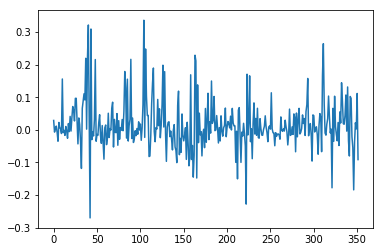

In [5]:
plt.figure()
plt.plot(Y)
plt.show()

In [6]:
print X.shape, Y.shape

(352, 49) (352,)


In [7]:
from keras.models import Sequential
from keras.models import Model
from keras.layers.core import Dense, Dropout, Activation, Flatten, Permute, Reshape
from keras.layers import Merge, Input, concatenate
from keras.layers.recurrent import LSTM, GRU, SimpleRNN
from keras.layers import Convolution1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D, RepeatVector, AveragePooling1D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from keras.layers.wrappers import Bidirectional, TimeDistributed
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import *
from keras.optimizers import RMSprop, Adam, SGD, Nadam
from keras.initializers import *
from keras.constraints import *
from keras import regularizers
from keras import losses

/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
def get_model(input_size):
    main_input = Input(shape=(input_size, ), name='main_input')
    x = Dense(25, activation='linear')(main_input)
    output = Dense(1, activation = "linear", name = "out")(x)
    final_model = Model(inputs=[main_input], outputs=[output])
    final_model.compile(optimizer='adam',  loss='mse')
    return final_model

In [9]:
from sklearn.model_selection import TimeSeriesSplit

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=10, min_lr=0.000001, verbose=0)
checkpointer = ModelCheckpoint(filepath="testtest.hdf5", verbose=0, save_best_only=True)
    
X_train, Y_train = X[:-30], Y[:-30]
X_test, Y_test = X[-30:], Y[-30:]
    
model = get_model(len(X_train[0]))
history = model.fit(X_train, Y_train, 
              epochs = 100, 
              batch_size = 64, 
              verbose=1, 
              validation_data=(X_test, Y_test),
              callbacks=[reduce_lr, checkpointer],
              shuffle=True)

Train on 322 samples, validate on 30 samples
Epoch 1/100
322/322 [==============================] - 0s - loss: 0.3210 - val_loss: 0.1768
Epoch 2/100
322/322 [==============================] - 0s - loss: 0.2467 - val_loss: 0.1585
Epoch 3/100
322/322 [==============================] - 0s - loss: 0.1946 - val_loss: 0.1426
Epoch 4/100
322/322 [==============================] - 0s - loss: 0.1560 - val_loss: 0.1331
Epoch 5/100
322/322 [==============================] - 0s - loss: 0.1261 - val_loss: 0.1222
Epoch 6/100
322/322 [==============================] - 0s - loss: 0.1025 - val_loss: 0.1110
Epoch 7/100
322/322 [==============================] - 0s - loss: 0.0832 - val_loss: 0.1038
Epoch 8/100
322/322 [==============================] - 0s - loss: 0.0729 - val_loss: 0.0983
Epoch 9/100
322/322 [==============================] - 0s - loss: 0.0636 - val_loss: 0.0890
Epoch 10/100
322/322 [==============================] - 0s - loss: 0.0564 - val_loss: 0.0798
Epoch 11/100
322/322 [============

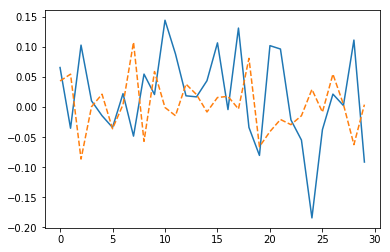

(322, 49) (30, 49) (322,) (30,)
0.0075026394634859035
0.06918683376091657


In [10]:
model.load_weights('testtest.hdf5')
pred = model.predict(X_test)
predicted = pred
original = Y_test
plt.plot(original)
plt.plot(predicted, linestyle = '--')
plt.show()
print X_train.shape, X_test.shape, Y_train.shape, Y_test.shape
print np.mean(np.square(predicted - original))
print np.mean(np.abs(predicted - original))

In [11]:
import tensorflow as tf
sess = tf.Session()
with sess.as_default():
    tf.global_variables_initializer().run()

dense_weights, out_weights = None, None
with sess.as_default():
    for layer in model.layers:
        if len(layer.weights) > 0:
            weights = layer.get_weights()
            if 'dense' in layer.name:
                dense_weights = layer.weights[0].eval()
            if 'out' in layer.name:
                out_weights = layer.weights[0].eval()

In [12]:
print dense_weights.shape
print out_weights.shape

print type(dense_weights)

(49, 25)
(25, 1)
<type 'numpy.ndarray'>


In [13]:
import torch
import torch.nn as nn
from torch.nn.functional import normalize  # noqa: F401
import torch.nn.functional as F

from torch.autograd import Variable

import pyro
from pyro.distributions import Normal, Bernoulli  # noqa: F401
from pyro.infer import SVI
from pyro.optim import Adam

pyro.get_param_store().clear()

In [14]:
X_train, Y_train = Variable(torch.Tensor(X[:-30])), Variable(torch.Tensor(Y[:-30]))
X_test, Y_test = Variable(torch.Tensor(X[-30:])), Variable(torch.Tensor(Y[-30:]))
data = torch.cat((X_train, Y_train), 1)

In [15]:
# get array of batch indices
def get_batch_indices(N, batch_size):
    all_batches = np.arange(0, N, batch_size)
    if all_batches[-1] != N:
        all_batches = list(all_batches) + [N]
    return all_batches

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, 1)   # output layer

    def forward(self, x):
        x = self.hidden(x)
        x = self.predict(x)
        return x

first_layer = len(X_train.data.numpy()[0])
second_layer = 25   
    
softplus = nn.Softplus()
regression_model = Net(first_layer, second_layer)

In [16]:
def model(data):

    mu = Variable(torch.zeros(second_layer, first_layer)).type_as(data)
    sigma = Variable(torch.ones(second_layer, first_layer)).type_as(data)
    bias_mu = Variable(torch.zeros(second_layer)).type_as(data)
    bias_sigma = Variable(torch.ones(second_layer)).type_as(data)
    w_prior, b_prior = Normal(mu, sigma), Normal(bias_mu, bias_sigma)
    
    mu2 = Variable(torch.zeros(1, second_layer)).type_as(data)
    sigma2 = Variable(torch.ones(1, second_layer)).type_as(data)
    bias_mu2 = Variable(torch.zeros(1)).type_as(data)
    bias_sigma2 = Variable(torch.ones(1)).type_as(data)
    w_prior2, b_prior2 = Normal(mu2, sigma2), Normal(bias_mu2, bias_sigma2)    
    
    priors = {'hidden.weight': w_prior, 
              'hidden.bias': b_prior,
              'predict.weight': w_prior2,
              'predict.bias': b_prior2}
    
    # lift module parameters to random variables sampled from the priors
    lifted_module = pyro.random_module("module", regression_model, priors)
    # sample a regressor (which also samples w and b)
    lifted_reg_model = lifted_module()

    with pyro.iarange("map", N, subsample=data):
        x_data = data[:, :-1]
        y_data = data[:, -1]
        # run the regressor forward conditioned on inputs
        prediction_mean = lifted_reg_model(x_data).squeeze()
        pyro.sample("obs",
                    Normal(prediction_mean, Variable(torch.ones(data.size(0))).type_as(data)),
                    obs=y_data.squeeze())
        

def guide(data):
    
    w_mu = Variable(torch.randn(second_layer, first_layer).type_as(data.data), requires_grad=True)
    w_log_sig = Variable(0.1 * torch.ones(second_layer, first_layer).type_as(data.data), requires_grad=True)
    b_mu = Variable(torch.randn(second_layer).type_as(data.data), requires_grad=True)
    b_log_sig = Variable(0.1 * torch.ones(second_layer).type_as(data.data), requires_grad=True)
    
    # register learnable params in the param store
    mw_param = pyro.param("guide_mean_weight", w_mu)
    sw_param = softplus(pyro.param("guide_log_sigma_weight", w_log_sig))
    mb_param = pyro.param("guide_mean_bias", b_mu)
    sb_param = softplus(pyro.param("guide_log_sigma_bias", b_log_sig))
    
    # gaussian guide distributions for w and b
    w_dist = Normal(mw_param, sw_param)
    b_dist = Normal(mb_param, sb_param)
    
    w_mu2 = Variable(torch.randn(1, second_layer).type_as(data.data), requires_grad=True)
    w_log_sig2 = Variable(0.1 * torch.randn(1, second_layer).type_as(data.data), requires_grad=True)
    b_mu2 = Variable(torch.randn(1).type_as(data.data), requires_grad=True)
    b_log_sig2 = Variable(0.1 * torch.ones(1).type_as(data.data), requires_grad=True)
    
    # register learnable params in the param store
    mw_param2 = pyro.param("guide_mean_weight2", w_mu2)
    sw_param2 = softplus(pyro.param("guide_log_sigma_weight2", w_log_sig2))
    mb_param2 = pyro.param("guide_mean_bias2", b_mu2)
    sb_param2 = softplus(pyro.param("guide_log_sigma_bias2", b_log_sig2))
    
    # gaussian guide distributions for w and b
    w_dist2 = Normal(mw_param2, sw_param2)
    b_dist2 = Normal(mb_param2, sb_param2)
      
    dists = {'hidden.weight': w_dist, 
              'hidden.bias': b_dist,
              'predict.weight': w_dist2,
              'predict.bias': b_dist2}
    
    # overloading the parameters in the module with random samples from the guide distributions
    lifted_module = pyro.random_module("module", regression_model, dists)
    # sample a regressor
    return lifted_module()

In [17]:
# instantiate optim and inference objects
optim = Adam({"lr": 0.001})
svi = SVI(model, guide, optim, loss="ELBO")

N = len(X_train)

for j in range(3000):
    epoch_loss = 0.0
    perm = torch.randperm(N)
    # shuffle data
    data = data[perm]
    # get indices of each batch
    all_batches = get_batch_indices(N, 64)
    for ix, batch_start in enumerate(all_batches[:-1]):
        batch_end = all_batches[ix + 1]
        batch_data = data[batch_start: batch_end]        
        epoch_loss += svi.step(batch_data)
    if j % 100 == 0:
        print(j, "avg loss {}".format(epoch_loss/float(N)))

(0, 'avg loss 991.628272394')
(100, 'avg loss 441.582249612')
(200, 'avg loss 314.615231342')
(300, 'avg loss 295.246842852')
(400, 'avg loss 243.860453161')
(500, 'avg loss 137.239890152')
(600, 'avg loss 88.3047235145')
(700, 'avg loss 162.848065678')
(800, 'avg loss 121.565960428')
(900, 'avg loss 69.0251002341')
(1000, 'avg loss 82.692127678')
(1100, 'avg loss 48.7133728406')
(1200, 'avg loss 45.6457220042')
(1300, 'avg loss 35.0357700135')
(1400, 'avg loss 33.2322527962')
(1500, 'avg loss 34.6992970342')
(1600, 'avg loss 26.8403509863')
(1700, 'avg loss 22.6639203374')
(1800, 'avg loss 18.9730090029')
(1900, 'avg loss 16.0454520468')
(2000, 'avg loss 15.0732588679')
(2100, 'avg loss 14.869928206')
(2200, 'avg loss 12.4058045571')
(2300, 'avg loss 12.0039140216')
(2400, 'avg loss 10.9979856503')
(2500, 'avg loss 10.3619899394')
(2600, 'avg loss 9.91170222122')
(2700, 'avg loss 9.61216157712')
(2800, 'avg loss 9.24607062488')
(2900, 'avg loss 8.75313279051')


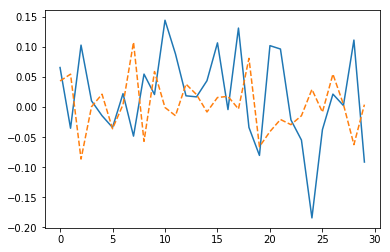

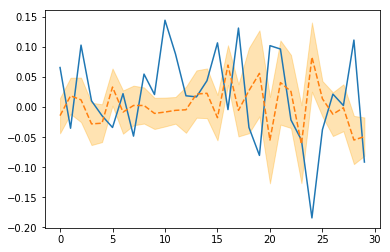

In [18]:
preds = []
for i in range(100):
    sampled_reg_model = guide(X_test)
    pred = sampled_reg_model(X_test).data.numpy().flatten()
    preds.append(pred)

preds = np.array(preds)
mean = np.mean(preds, axis=0)
std = np.std(preds, axis=0) / 10
y_test = Y_test.data.numpy()
x = np.arange(len(y_test))

plt.figure()
plt.plot(original)
plt.plot(predicted, linestyle = '--')
plt.show()

plt.figure()
plt.plot(x, y_test)
plt.plot(x, mean, linestyle = '--')
plt.fill_between(x, mean-std, mean+std, alpha = 0.3, color = 'orange')
plt.show()

In [19]:
for name in pyro.get_param_store().get_all_param_names():
    print name, pyro.param(name).data.numpy()

guide_log_sigma_weight [[ 0.50192475  0.51076746  0.51509345 ... -0.1179393   0.29035404
   0.51736194]
 [ 0.5277091   0.52925414  0.51861405 ... -0.02726972  0.28255418
   0.56837153]
 [ 0.5585237   0.55726624  0.52904606 ...  0.03537597  0.4025882
   0.5640283 ]
 ...
 [ 0.5145268   0.51686174  0.5132375  ... -0.03324918  0.30306128
   0.5353028 ]
 [ 0.5098845   0.53648275  0.6095274  ... -0.29507694  0.2410524
   0.51353073]
 [ 0.4848034   0.5118769   0.5154141  ... -0.28002024  0.2551447
   0.55328846]]
guide_log_sigma_bias [-0.4047134  -0.42904395 -0.2603327  -0.49593884 -0.4594268  -0.50494486
 -0.39657813 -0.47920516 -0.3834359  -0.31807137 -0.47360417 -0.7194065
 -0.23133528 -0.5053686  -0.40042615 -0.35218015 -0.4143426  -0.549722
 -0.46098587 -0.4593335  -0.4999823  -0.39010924 -0.4204428  -0.53431034
 -0.5573799 ]
guide_mean_bias2 [0.01573819]
guide_mean_weight2 [[ 5.60731301e-03 -2.91480403e-03  1.11589301e-03  1.44235836e-02
   2.62638857e-03  3.78019689e-03 -4.87976149e-03

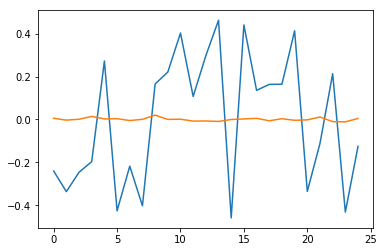

In [20]:
plt.figure()
plt.plot(out_weights)
plt.plot(pyro.param('guide_mean_weight2').data.numpy()[0])
plt.show()

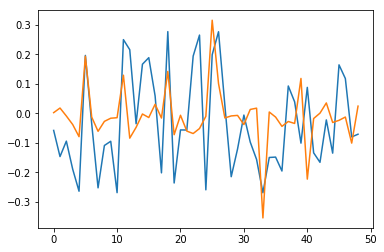

In [31]:
plt.figure()
plt.plot(dense_weights.T[14])
plt.plot(pyro.param('guide_mean_weight').data.numpy()[10])
plt.show()

In [24]:
print out_weights.mean(), out_weights.std()
print pyro.param('guide_mean_weight2').data.numpy()[0].mean(), pyro.param('guide_mean_weight2').data.numpy()[0].mean()

-0.0025901748 0.30395043
0.0005974418 0.0005974418
